In [2]:
import json
from utils import *
from run import run_, DEFAULT_ARGS
import matplotlib.pyplot as plt
import numpy as np

Primeira parte do projeto

- [x] Em quantas execuções o algoritmo convergiu (n o /30 execuções); [1 requisito](#1)
- [x] Em que iteração o algoritmo convergiu (média e desvio padrão); [2 requisito](#2)
- [ ] Fitness médio da população em cada uma das 30 execuções; [3 requisito](#3)
- [ ] Fitness médio alcançado nas 30 execuções (média e desvio padrão); [4 requisito](#4)
- [ ] Colocar gráficos de convergência com a média e o melhor indivíduo por iteração;
- [ ] Análise adicional: Quantas iterações são necessárias para toda a população convergir?
- [ ] Número de indivíduos que convergiram por execução; 

<a id='1'></a>
## Em quantas execuções o algoritmo convergiu?

In [4]:
"""
First run with default parameters
"dna_size": 8, 
"population_size": 100, 
"gene_set": "01", 
"max_iterations": 10000,
"parent_method": "tournament", 
"survivor_method": "best",
"recombination_method": "cutandfill", 
"recombination_probability": 0.9, 
"mutation_method": "single",
"mutation_probability": 0.4 
"""

args = DEFAULT_ARGS 
filename_ = "default"

run_(args, filename=filename_, n_runs=30)

'15 solutions of 30 were found in 10.02 seconds'

In [5]:
with open(filename_ + '.json', 'r') as f:
    data = json.load(f)

<a id='2'></a>
## Em que iterações o algoritmo convergiu? (Média e desvio padrão)

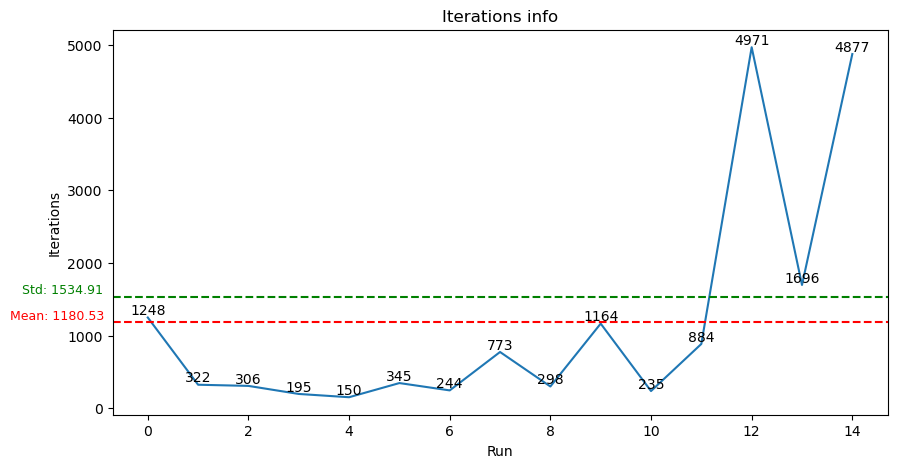

In [25]:
iterations_info = [i["iterations"] for i in data if i["iterations"] != 10000]

iterations_mean = np.mean(iterations_info)
rounded_mean = round(iterations_mean, 2)

iterations_std = np.std(iterations_info)
rounded_std = round(iterations_std, 2)

#plot iterations, mean and std
plt.figure(figsize=(10, 5))
plt.title("Iterations info")
plt.xlabel("Run")
plt.ylabel("Iterations")

plt.plot(iterations_info)
for i in range(len(iterations_info)):
    plt.text(i, iterations_info[i], str(iterations_info[i]), ha='center', va='bottom', color='black')

#put mean and std at the begin of the plot
plt.axhline(y=rounded_mean, color='r', linestyle='--')
plt.text(-1.8, rounded_mean, "Mean: " + str(rounded_mean), ha='center', va='bottom', color='red', fontsize=9)
plt.axhline(y=rounded_std, color='g', linestyle='--')
plt.text(-1.7, rounded_std, "Std: " + str(rounded_std), ha='center', va='bottom', color='green', fontsize=9)

plt.show()


<a id='2'></a>
## Fitness médio da população em cada uma das 30 execuções

In [22]:
# plt.title("Mean fitness x Run")
# plt.figure(figsize=(10, 4))
plt.xlabel("Run")
plt.ylabel("Mean Fitness")
plt.grid(True)

mean_it = [np.mean(i["mean_per_iteration"]) for i in data]
x = np.arange(len(mean_it))

for i in range(len(mean_it)):
    plt.text(x, mean_it[i], str(mean_it[i]))

plt.bar(x, mean_it, align='center')

# mean_per_run = np.mean(mean_it[-1])
# plt.axhline(y=mean_per_run, color=colors[0], linestyle='--')
plt.plot()

# plt.axhline(y=mean, color='r', linestyle='--')
# plt.text(0, rounded_mean, "Mean: " + str(rounded_mean), ha='center', va='bottom', color='red')

# plt.axhline(y=rounded_std, color='g', linestyle='--')
# plt.text(0, rounded_std, "Std: " + str(rounded_std), ha='center', va='bottom', color='green')

# plt.show()



[]

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 640x480 with 1 Axes>

<a id='4'></a>
## Fitness médio alcançado nas 30 execuções (média e desvio padrão)

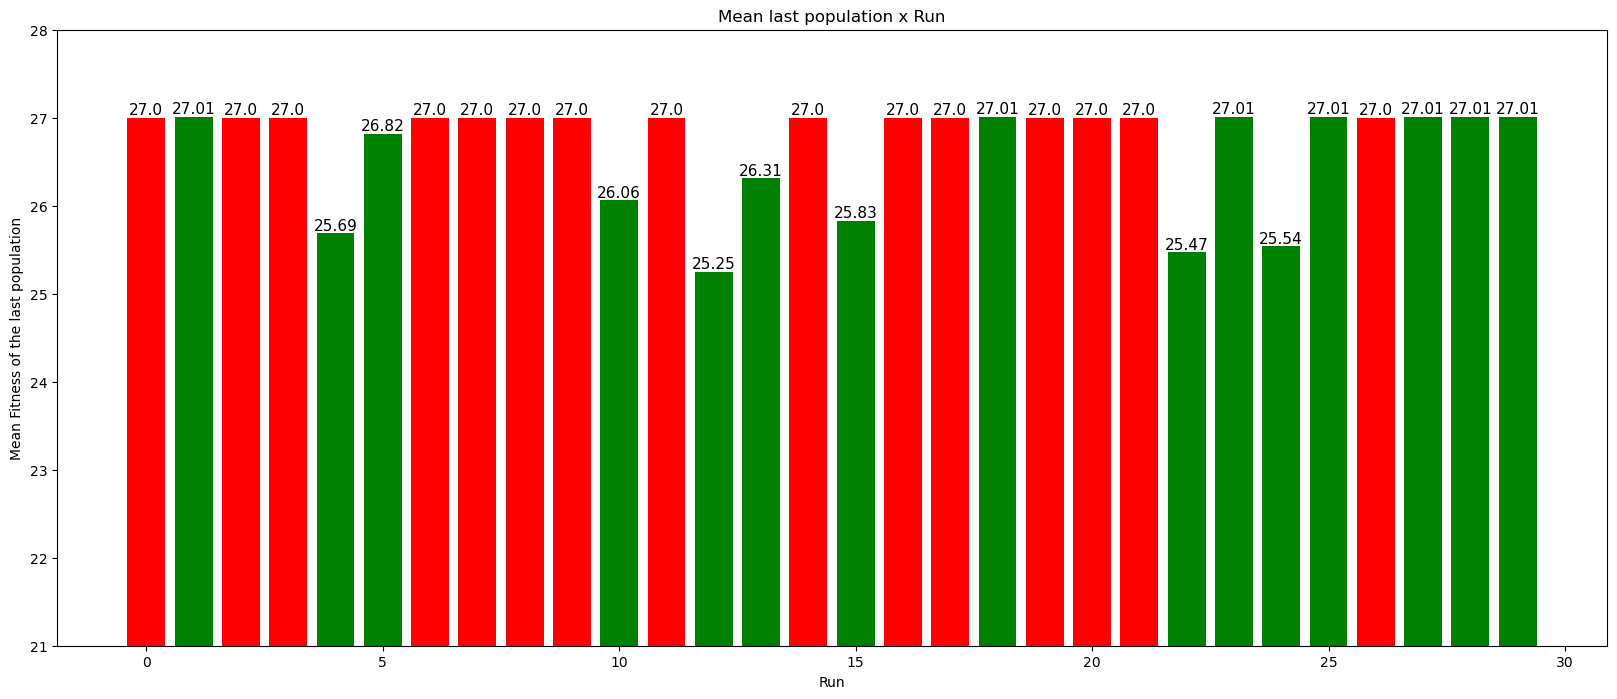

In [42]:
last_population = [i["last_population_fitness"] for i in data]

mean_last_population = []
std = []
aux = []
for run in data:
    mean_last_population.append(np.mean(run["last_population_fitness"]))
    aux.append(run["found_solution"])
    
     
plt.figure(figsize=(20, 8))
plt.title("Mean last population x Run")
plt.xlabel("Run")
plt.ylabel("Mean Fitness of the last population")
plt.ylim(21, 28)

colors = ['red' if i == False else 'green' for i in aux]
plt.bar(range(len(mean_last_population)), mean_last_population, align='center', color=colors)
#for each bar plot the value of the mean
for i in range(len(mean_last_population)):
    plt.text(i, mean_last_population[i], str(mean_last_population[i]), ha='center', va='bottom', color='black', fontsize=11)
    std = std.append(np.std(mean_last_population[i]))
    
#mean_last_population

#plot std as a line
#plot mean_convex as a line
#mean_convex = np.mean(mean_convex)
#plt.axhline(y=mean_convex, color='black', linestyle='--')
#plt.text(-1, mean_convex, "Mean: " + str(round(mean_convex, 2)), ha='center', va='bottom', color='black', fontsize=11)
#plt.plot(mean_convex, color='black', linestyle='--')
#plt.show()

